<a href="https://colab.research.google.com/github/DaVOVAN/MO_Trefilov/blob/main/laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
dataset = pd.read_csv("/content/drive/MyDrive/Нейросети/car_prices.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
dataset_feature_names = list(dataset.columns.values)
print(dataset_feature_names)

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype', 'cylindernumber', 'fuelsystem']
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']

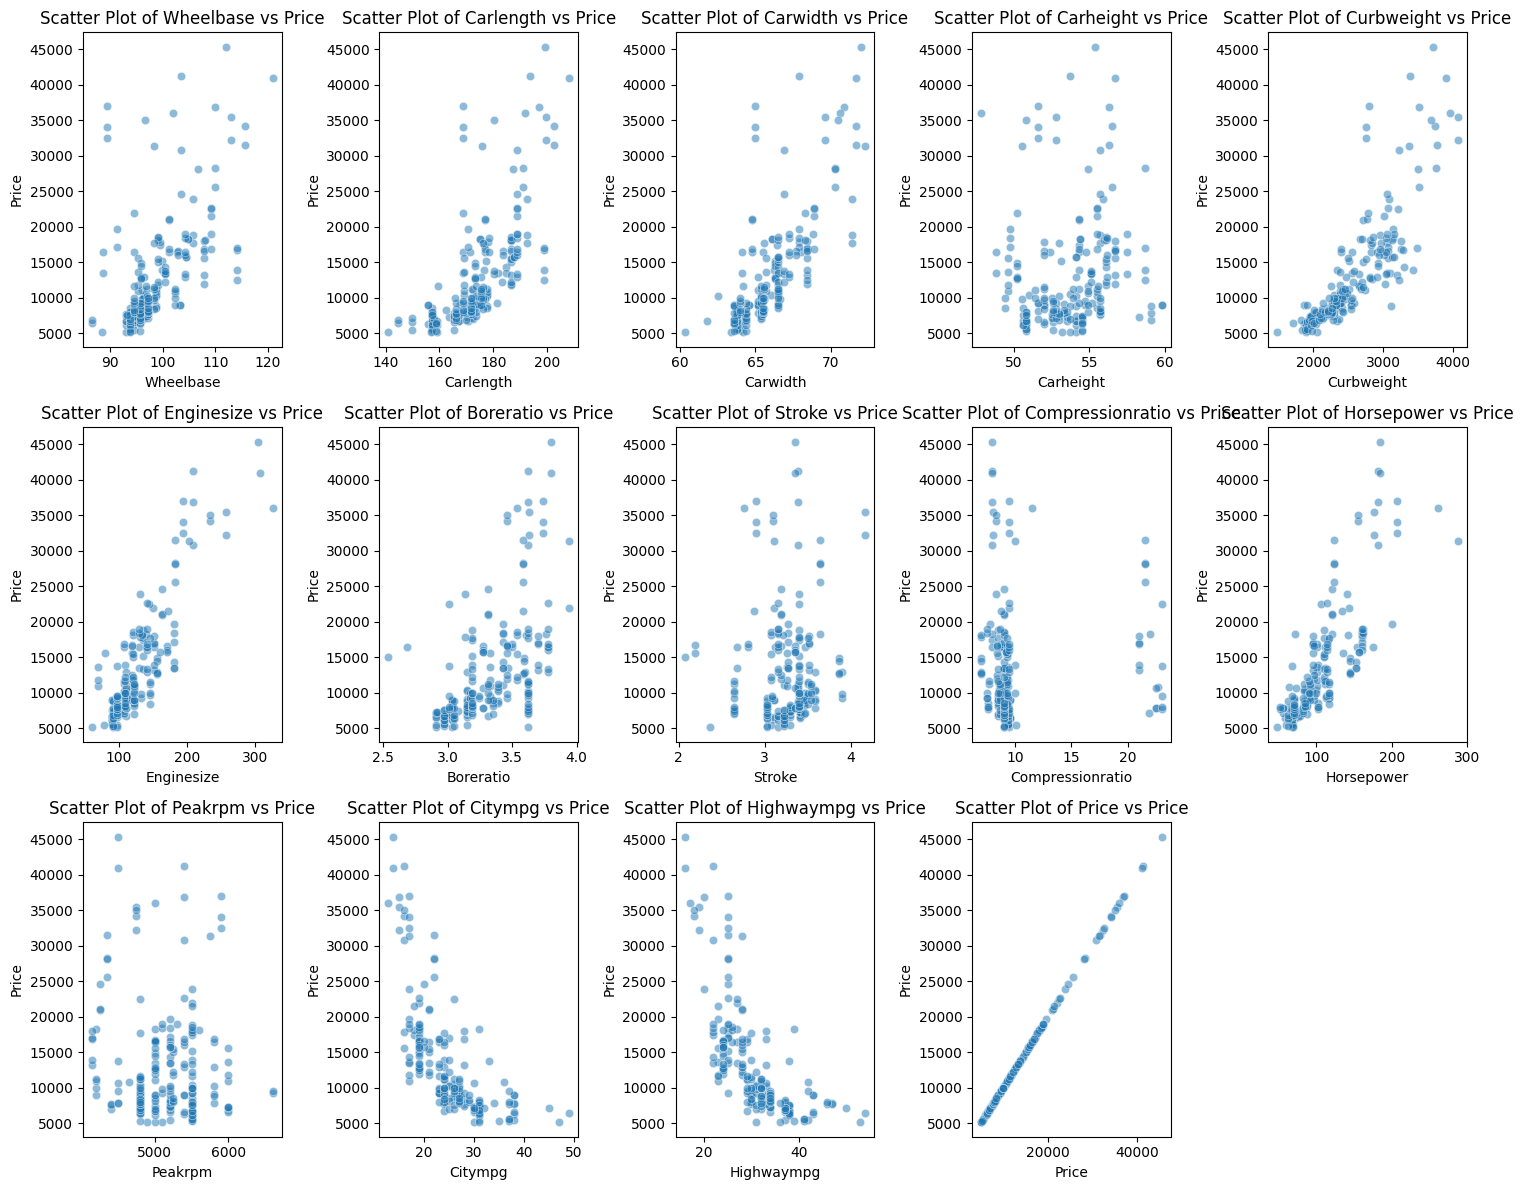

In [ ]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 5, i + 1)
    sns.scatterplot(x=feature, y='price', data=dataset, alpha=0.5)
    plt.title(f'Scatter Plot of {feature.capitalize()} vs Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
# Extract brand and model from CarName
dataset['brand'] = dataset['CarName'].apply(lambda x: x.split(' ')[0])
dataset['model'] = dataset['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Feature engineering
dataset['power_to_weight_ratio'] = dataset['horsepower'] / dataset['curbweight']

#for column in numerical_columns:
 #   df[f'{column}_squared'] = df[column] ** 2
#df['log_enginesize'] = np.log(df['enginesize'] + 1)
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model,power_to_weight_ratio
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,2.68,9.0,111,5000,21,27,13495.0,1,79,0.043564
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,2.68,9.0,111,5000,21,27,16500.0,1,123,0.043564
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,3.47,9.0,154,5000,19,26,16500.0,1,29,0.054552
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,3.40,10.0,102,5500,24,30,13950.0,2,1,0.043646
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,3.40,8.0,115,5500,18,22,17450.0,2,2,0.040722


In [ ]:
# Splitting the dataset
X = dataset.drop(['price', 'CarName','car_ID'], axis=1)  # Include the engineered features and CarName
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pr_LR = modelLR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  3443.3565
  R2: 0.8498
 Adjusted R2: 0.5709
 Cross Validated R2: 0.828


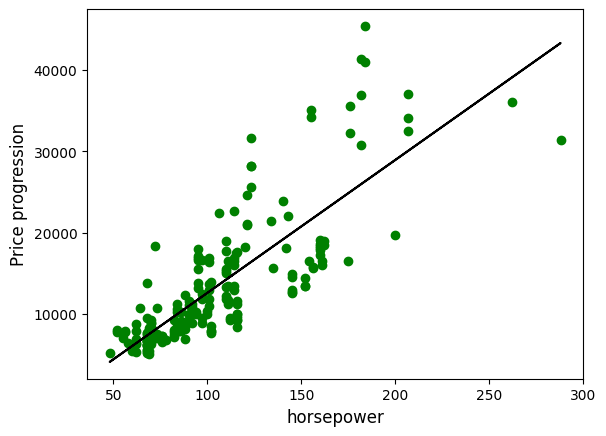

In [ ]:
X2 = dataset['horsepower'].values[:,np.newaxis]
y2 = dataset['price'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price progression', size=12)
plt.xlabel('horsepower', size=12)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
modelPR = LinearRegression()

modelPR.fit(X_p_train, y_p_train)

y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  24357.6718
  R2: -7.5632
 Adjusted R2: 1.1454
 Cross Validated R2: -15.9643


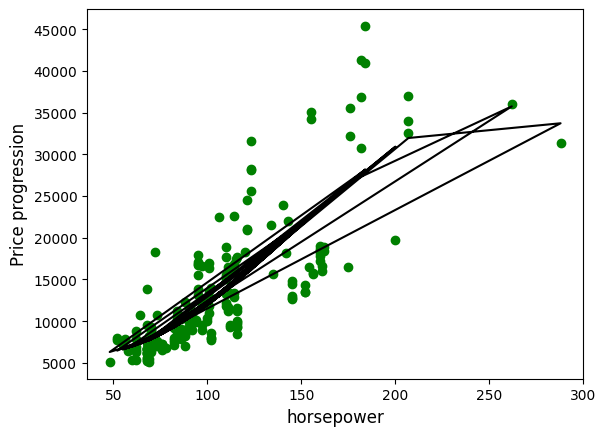

In [ ]:
X2 = dataset['horsepower'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['price'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Price progression', size=12)
plt.xlabel('horsepower', size=12)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor()

modelDT.fit(X_train, y_train)

y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  3765.2467
  R2: 0.8204
 Adjusted R2: 0.4869
 Cross Validated R2: 0.7982


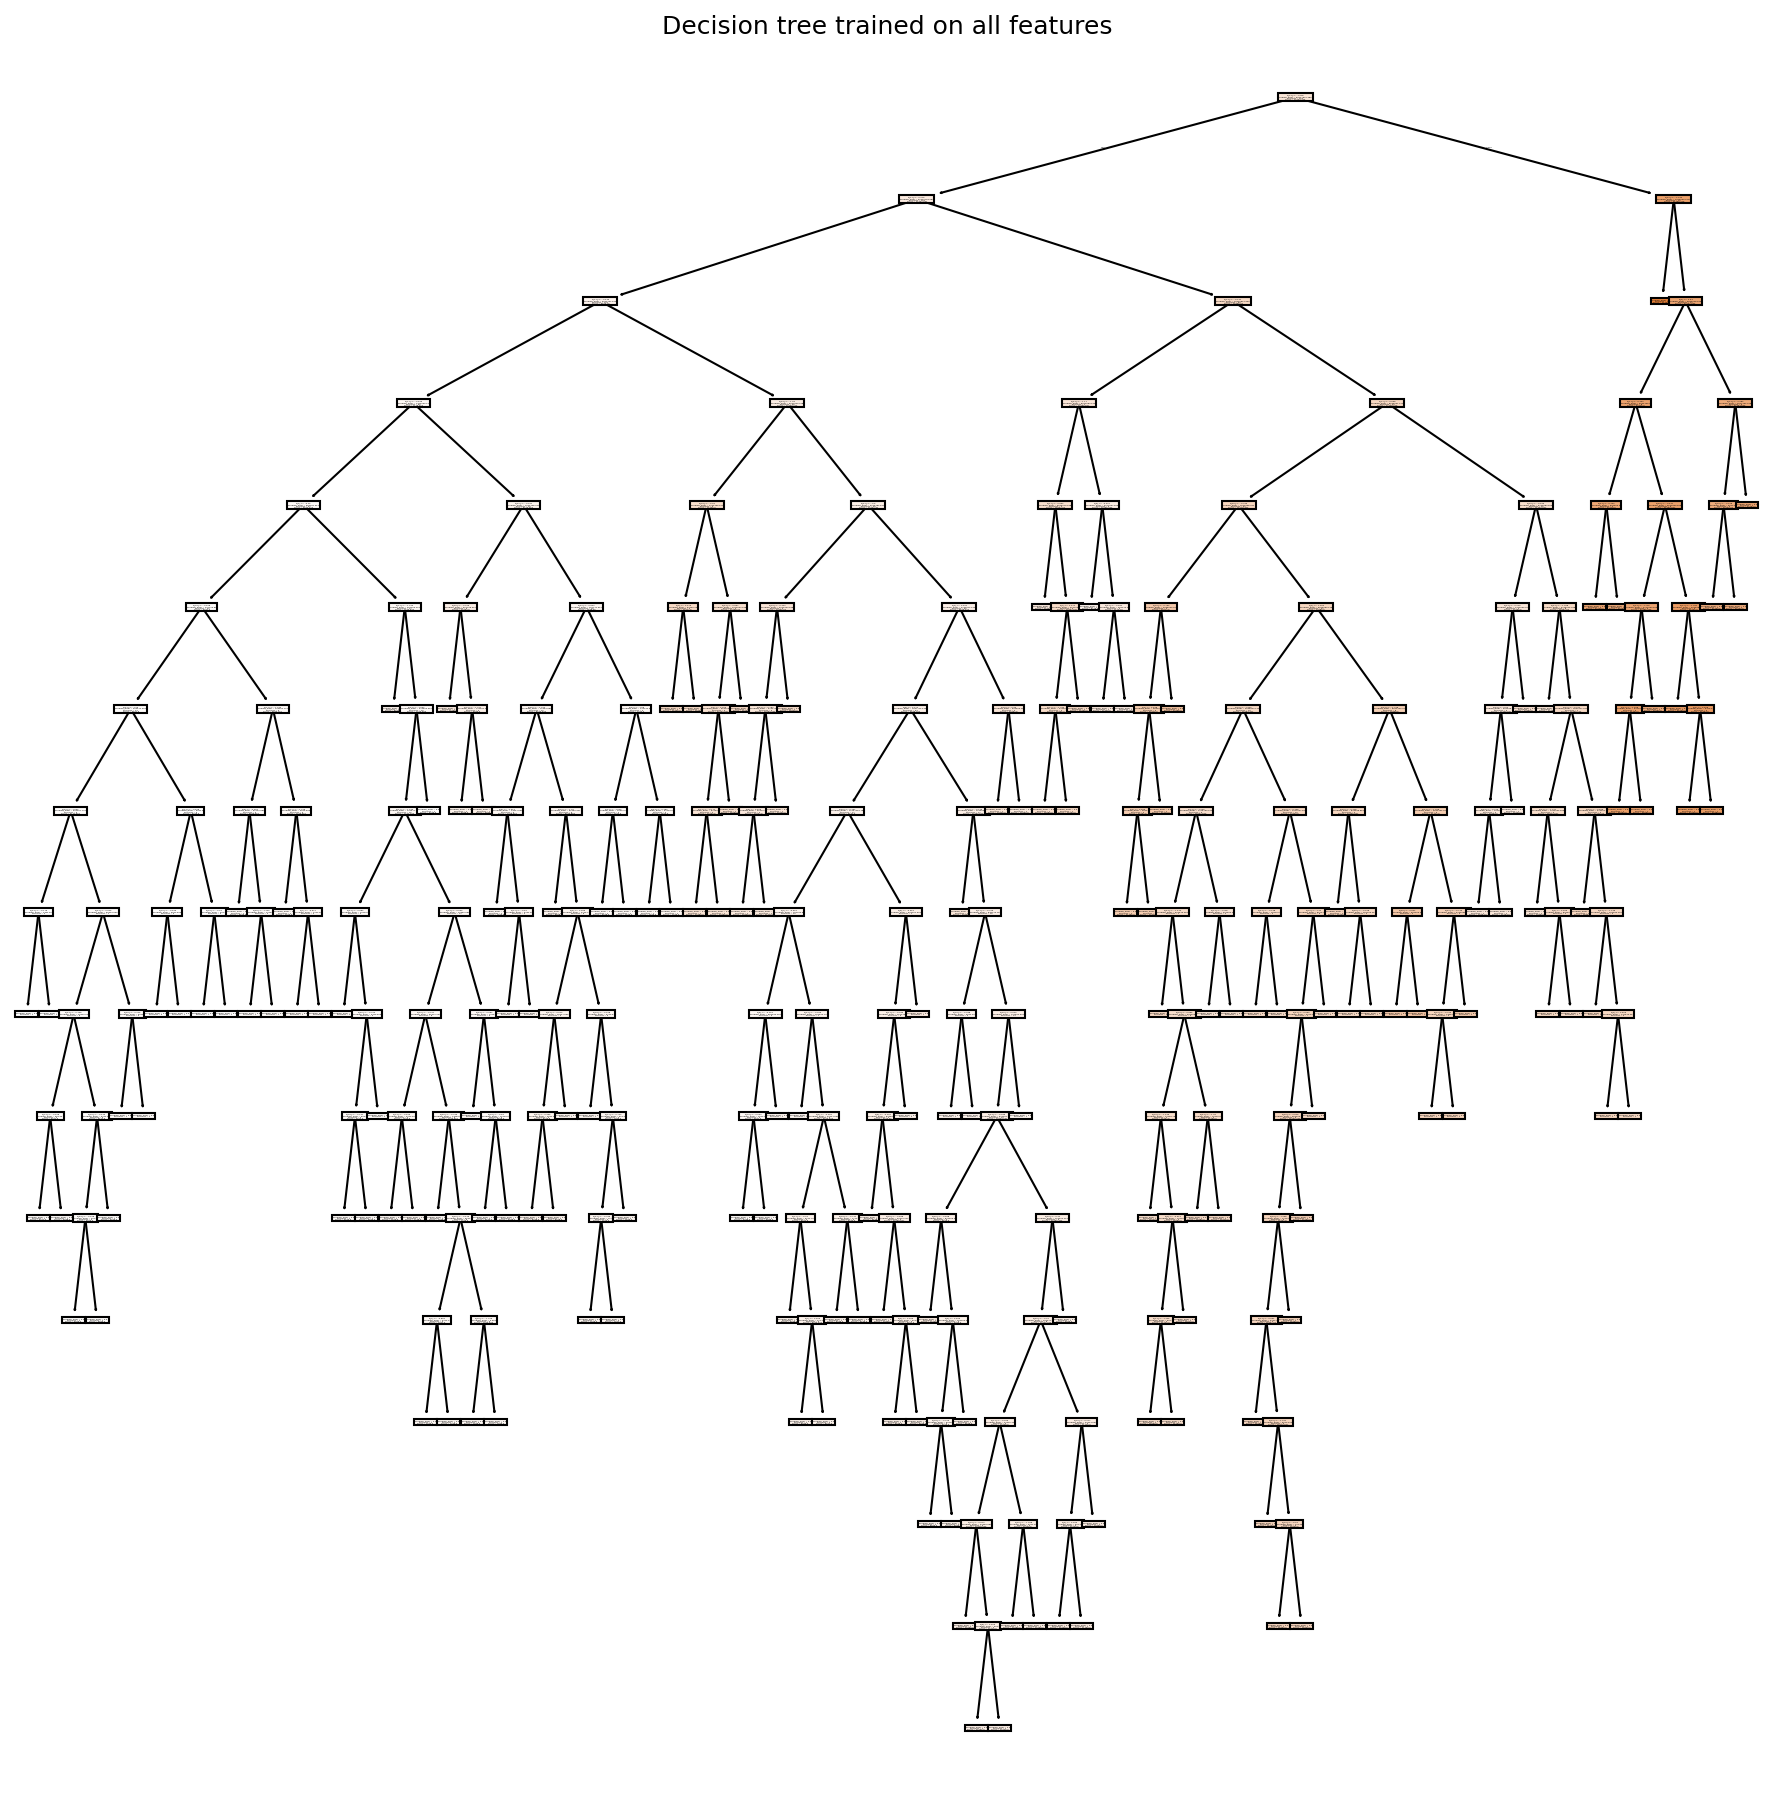

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15), dpi=150)
tree.plot_tree(modelDT, filled = True)
plt.title("Decision tree trained on all features")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=100)

modelRF.fit(X_train, y_train)

y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  3066.418
  R2: 0.8809
 Adjusted R2: 0.6597
 Cross Validated R2: 0.8791


In [ ]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.727380,-3.151719,-0.463481,-0.917985,0.457214,1.191318,-0.136505,1.037085,0.072450,0.083817,...,0.405836,1.215101,3.099860,-0.815386,-1.917829,0.964316,1.313501,-0.455853,1.226070,-1.373586
1,-0.727380,0.317287,-0.463481,-0.917985,0.457214,1.191318,-0.136505,1.541231,1.043916,1.170268,...,0.517384,-3.360166,-0.439591,-0.241894,-0.292907,-0.988126,-1.024569,0.081988,-1.182019,-0.948129
2,-0.727380,0.317287,-0.463481,-0.917985,1.610800,-0.634627,-0.136505,-0.508962,-0.367616,-1.097108,...,-1.007108,-0.709667,-0.283439,-1.064730,-0.699137,0.964316,1.001758,1.023209,-0.199126,-1.320619
3,0.078636,0.317287,-0.463481,-0.917985,0.457214,-0.634627,-0.136505,-0.710620,-0.732953,-1.002634,...,-0.635281,0.110726,-0.179337,-0.890189,0.113323,0.964316,1.001758,-0.052472,0.587189,-0.534180
4,-0.727380,0.317287,-0.463481,1.089342,-0.696372,-0.634627,-0.136505,-0.374523,-0.550285,-0.341316,...,-0.635281,1.025779,-0.283439,-0.466304,1.332015,0.313502,0.378273,-0.993694,-0.493994,-0.276209


In [ ]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  8452.9659
  R2: 0.0949
 Adjusted R2: -1.586
 Cross Validated R2: 0.0717


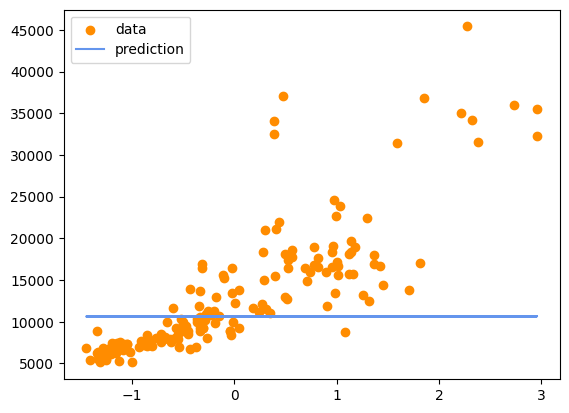

In [ ]:
plt.scatter(X_train[11], y_train, color='darkorange', label='data')
plt.plot(X_train[11], modelSVR.predict(X_train), color='cornflowerblue', label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  9304.0816
  R2: -0.0965
 Adjusted R2: -2.133
 Cross Validated R2: -0.1401


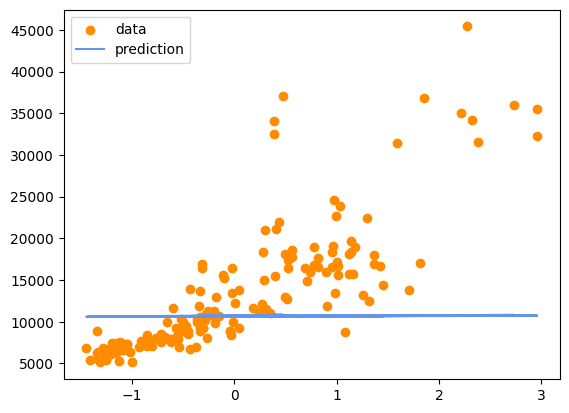

In [ ]:
plt.scatter(X_train[11], y_train, color='darkorange', label='data')
plt.plot(X_train[11], modelSVR.predict(X_train), color='cornflowerblue', label='prediction')
plt.legend()
plt.show()

In [ ]:

#Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  9319.2339
  R2: -0.1001
 Adjusted R2: -2.1432
 Cross Validated R2: -0.1443


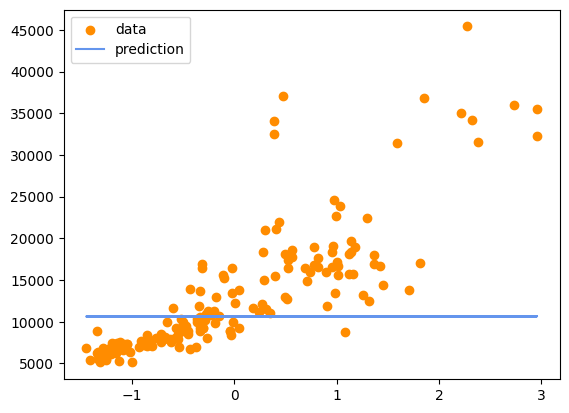

In [ ]:
plt.scatter(X_train[11], y_train, color='darkorange',
            label='data')
plt.plot(X_train[11], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

modelEN.fit(X_train, y_train)

y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  3438.7712
  R2: 0.8502
 Adjusted R2: 0.572
 Cross Validated R2: 0.8508


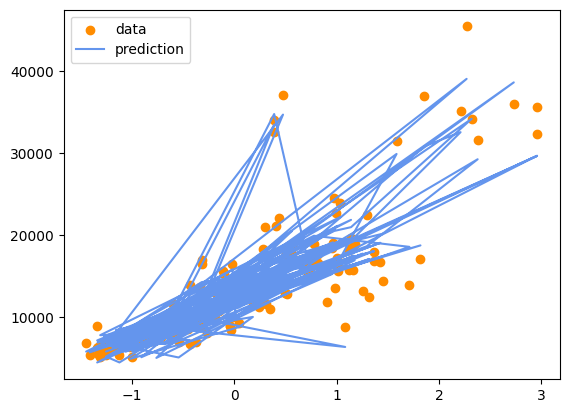

In [ ]:
plt.scatter(X_train[11], y_train, color='darkorange',
            label='data')
plt.plot(X_train[11], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()